# Desafios:
Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

Desafio 03: Melhorar o gráfico da distribuição do gráfico:

Escolha apenas alguns estados.
Mude a palete de cores.
Posicione a legenda de forma mais adequada.
Adicione título principal e nos eixos x e y.

## Leitura dos dados

In [191]:
import pandas as pd

In [192]:
dados = pd.read_csv('../Dados/UF_AnoMesAtend_ValorTotal.csv', encoding="ISO-8859-1", skiprows=3, sep=";", 
                    skipfooter=12, thousands=".", decimal=",")
dados.head()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


### Adicionando a média no valor de agosto do Acre

In [193]:
import numpy as np

In [194]:
selecao = dados.T[1]
selecao.replace('-', np.nan, inplace = True)
selecao.fillna(0, inplace = True)
selecao = selecao.drop('Total')

In [195]:
valor = round(selecao.tail(-1).astype('float').mean(), 2)

In [196]:
dados['2020/Ago'].replace('-', valor, inplace = True)
dados['2020/Ago'] = dados['2020/Ago'].astype('float')

### Selecionando as colunas utilizaveis

In [197]:
utilizaveis = dados.mean().index.tolist()
utilizaveis.insert(0, 'Unidade da Federação')

In [198]:
dados_usaveis = dados[utilizaveis].sort_values('Total', ascending = False)

### Dropando total

In [199]:
dados_usaveis = dados_usaveis.drop('Total', 1)
dados_usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
19,35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
16,31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
20,41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
22,43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
18,33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


### Setando indice como UF

In [200]:
dados_usaveis = dados_usaveis.set_index('Unidade da Federação')
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


### Removendo numeração dos nomes dos estados

In [201]:
dados_usaveis.index = dados_usaveis.index.str[3:]
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


### Setando as colunas como Data

In [202]:
import datetime

In [203]:
meses = {
    'Jan': 1,
    'Fev': 2,
    'Mar': 3,
    'Abr': 4,
    'Mai': 5,
    'Jun': 6,
    'Jul': 7,
    'Ago': 8,
    'Set': 9,
    'Out': 10,
    'Nov': 11,
    'Dez': 12,
}

In [204]:
def para_dia(ano_mes):
    ano: int = int(ano_mes[:4])
    mes: str = ano_mes[5:]
    mes_numero: int = meses[mes]
    return datetime.date(ano, mes_numero, 1)

In [205]:
dados_usaveis.columns = dados_usaveis.columns.map(para_dia)

### Selecionando data a partir de fevereiro 2008

In [206]:
teste = dados_usaveis.columns[6:]
dados_usaveis = dados_usaveis[teste]
dados_usaveis.head()

,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,...,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
Rio Grande do Sul,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,5.375967e+07,5.639165e+07,5.623376e+07,5.791017e+07,5.959212e+07,5.756574e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
Rio de Janeiro,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,4.410293e+07,4.434852e+07,4.248794e+07,4.306646e+07,4.455331e+07,4.135151e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


# Desafio 02: 
Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [207]:
mensal = dados_usaveis.T
mensal_derretido = mensal.reset_index().melt(id_vars = ['index'], value_vars = mensal.columns)
mensal_derretido.head()

,index,Unidade da Federação,value
0,2008-02-01,São Paulo,1.728349e+08
1,2008-03-01,São Paulo,1.704818e+08
2,2008-04-01,São Paulo,1.702783e+08
3,2008-05-01,São Paulo,1.724022e+08
4,2008-06-01,São Paulo,1.754166e+08


In [208]:
mensal_derretido.columns = ['mes', 'uf', 'gastos']

In [209]:
mensal_derretido.head()

,mes,uf,gastos
0,2008-02-01,São Paulo,1.728349e+08
1,2008-03-01,São Paulo,1.704818e+08
2,2008-04-01,São Paulo,1.702783e+08
3,2008-05-01,São Paulo,1.724022e+08
4,2008-06-01,São Paulo,1.754166e+08


### Revertendo melt

In [210]:
revert = mensal_derretido.pivot(index = 'uf', columns = 'mes', values = 'gastos').reset_index()

In [211]:
revert.set_index('uf', inplace = True)
revert.head()

mes,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,...,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01
uf,,,,,,,,,,,,,,,,,,,,,
Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,1513194.39
Alagoas,8112220.30,9210505.56,10466691.94,9844096.03,10288668.11,9385440.40,9262767.68,9228201.96,9464597.85,9578540.01,...,16429689.91,15969025.28,17263960.88,15228725.99,15998721.86,14241361.44,15254204.31,14278872.07,13087850.40,6487947.82
Amapá,1275063.72,1177745.93,1396371.51,1411520.77,1420892.01,1367235.47,1550340.63,1550166.99,1635676.50,1647903.31,...,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,834187.31
Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
Bahia,33410124.06,41301703.40,42826993.62,42071294.17,39910042.40,57664560.93,43254543.33,42851268.02,43332573.68,40946908.97,...,72314938.33,68576836.10,74373631.19,67697544.36,70340301.29,59109689.20,61756775.71,65159300.63,58898100.40,26023558.53


# Desafio 03: 
Melhorar o gráfico da distribuição do gráfico:<br>
Escolha apenas alguns estados. Mude a palete de cores. Posicione a legenda de forma mais adequada. Adicione título principal e nos eixos x e y.

In [301]:
# Selecionando os 5 primeiros estados
selecao = mensal_derretido['uf'].unique()[:5]

In [302]:
# Selecionando os valores dos 5 estados
escolhidos = mensal_derretido[mensal_derretido['uf'].isin(selecao)]

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style('darkgrid')
sns.set_palette('Accent')

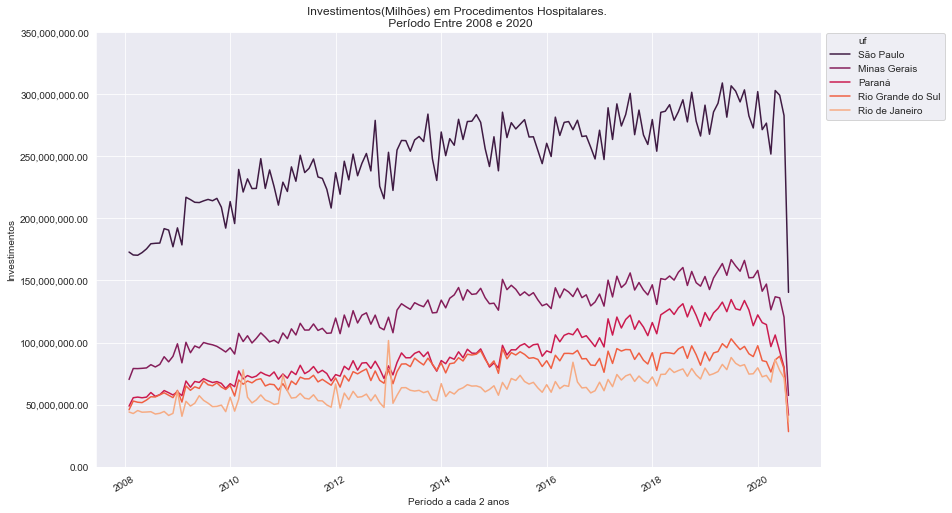

In [320]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(data = escolhidos, x = 'mes', y = 'gastos', hue = "uf", palette = 'rocket')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Investimentos(Milhões) em Procedimentos Hospitalares. \n Período Entre 2008 e 2020')
plt.xticks(rotation = 30)
plt.legend(loc = "best", bbox_to_anchor=(1,1.01)).set_title('')
ax.set_ylim(0, 350000000)
ax.set_ylabel('Investimentos')
ax.set_xlabel('Período a cada 2 anos')
plt.show()